### IS445 Final Project, Part 1
Kay Avila

In [1]:
import pandas as pd

#### Dataset Background

This dataset is a colloboration between myself and Dr. Melody Green from the [Urbana Theological Seminary](http://www.urbanatheologicalseminary.org).

Dr. Green is currently researching children's bible storybooks and has collected over 300 of them.  She was kind enough to type up roughly 250 of the ISBNs for me.  I created a python script for querying the [OpenLibrary](https://openlibrary.org/developers/api) and [ISBN DB](https://isbndb.com/isbn-database) APIs to resolve information about the books based on the ISBN.  (I called this the "isbn-indexer" and it is available on [GitHub](https://github.com/kayavila/isbn-indexer).)

From there, I used OpenRefine to try to come to the "best guess" answer for the author, illustrator, publisher, location, and number of pages fields.  Unfortunately I did a lot of individual cell editing, which isn't reusable (and OpenRefine doesn't include it in the export).  However, transforms are, and these are [uploaded to GitHub](https://github.com/kayavila/IS445-Final-StorybookBibles/blob/main/dataset-creation/openrefine_transforms.json).

Because my collaborator ultimately hopes to continue collaborating with me on this dataset, and to publish research based on it, she's asked me to keep the dataset private.  So, for now, it isn't publicly licensed.

#### Dataset Information

The dataset is currently 205 rows long, though it may increase as Dr. Green provides more ISBNs to me in the future.  There are 26 columns.  On disk, it takes up 73 KB.

In [72]:
df = pd.read_csv('Storybook-Bibles.csv')  # Input file needs to be in the local directory  

In [73]:
df.columns

Index(['isbn', 'title', 'ol_title', 'idb_title', 'first_author', 'illustrator',
       'other_authors', 'other_illustrators', 'ol_author', 'idb_author',
       'ol_contributor', 'ol_by', 'publisher', 'ol_publisher_clustered',
       'idb_publisher_clustered', 'ol_publisher', 'idb_publisher', 'location',
       'ol_location', 'year', 'ol_year', 'idb_year', 'pages', 'ol_pages',
       'idb_pages', 'idb_msrp'],
      dtype='object')

In [74]:
df.dtypes

isbn                        object
title                       object
ol_title                    object
idb_title                   object
first_author                object
illustrator                 object
other_authors               object
other_illustrators          object
ol_author                   object
idb_author                  object
ol_contributor              object
ol_by                       object
publisher                   object
ol_publisher_clustered      object
idb_publisher_clustered     object
ol_publisher                object
idb_publisher               object
location                    object
ol_location                 object
year                       float64
ol_year                    float64
idb_year                   float64
pages                      float64
ol_pages                   float64
idb_pages                  float64
idb_msrp                   float64
dtype: object

Rows that start with the prefix "ol_" come from OpenLibrary API data.  Rows that start with "idb_" come from ISBN DB.  These have not been altered from what the isbn-indexer script produced, with the except of the "ol_publisher_clustered" and "idb_publisher_clustered" columns, which underwent OpenRefine clustering.  I worked with these to create the following columns, based on comparing data from the two ISBN resolver services, and sometimes double-checking against Amazon:

* title
* first_author
* illustrator
* other_authors
* other_illustrators
* publisher
* location
* year
* pages

These, plus idb_msrp, are the ones that I will be using for the final project.  I didn't create a separate msrp column, because OpenLibrary doesn't include that data, so I had nothing to compare the ISBN DB's results to.

#### Dataset Exploration - Part 1

I'm pretty intimately familiar with the dataset, having created it, so I can point out some of its interesting characteristics but there's less discovery to be done than if I were unfamiliar with it.

Some data visualization could be done on comparing OpenLibrary versus ISBN DB results, but since Dr. Green is interested in exploring the correct data (which she'll undoubtedly probably double-check all of at some point) rather than the different ISBN databases, I'll go ahead and drop those by re-reading in the data and only keeping relevant columns.

In [75]:
df = pd.read_csv('Storybook-Bibles.csv',  # Input file needs to be in the local directory  
                 usecols=['isbn', 'title', 'first_author', 'illustrator', 'other_authors', 'other_illustrators',
                          'publisher', 'location', 'year', 'pages', 'idb_msrp']
                )

df.rename(columns={'idb_msrp': 'msrp'}, inplace=True)

In [76]:
# Some of the columns have null values
for col in df.columns:
    print('Column "{}":'.format(col))
    print(df[col].isna().value_counts(), '\n')

Column "isbn":
False    204
Name: isbn, dtype: int64 

Column "title":
False    204
Name: title, dtype: int64 

Column "first_author":
False    193
True      11
Name: first_author, dtype: int64 

Column "illustrator":
False    107
True      97
Name: illustrator, dtype: int64 

Column "other_authors":
True     178
False     26
Name: other_authors, dtype: int64 

Column "other_illustrators":
True     192
False     12
Name: other_illustrators, dtype: int64 

Column "publisher":
False    203
True       1
Name: publisher, dtype: int64 

Column "location":
True     103
False    101
Name: location, dtype: int64 

Column "year":
False    202
True       2
Name: year, dtype: int64 

Column "pages":
True     152
False     52
Name: pages, dtype: int64 

Column "msrp":
False    200
True       4
Name: msrp, dtype: int64 



In [77]:
# Note location is especially poorly filled out, with roughly half of the values missing

In [78]:
# MSRP doesn't have many nulls, but some of the columsn are equal to zero, so it's more than it initially seems
zero_msrps = df['msrp'] <= 0
zero_msrps.value_counts()

False    146
True      58
Name: msrp, dtype: int64

In [79]:
# Set these to NA
df.loc[df['msrp'] <= 0, 'msrp'] = None
zero_msrps = df['msrp'] <= 0
zero_msrps.value_counts()

False    204
Name: msrp, dtype: int64

#### Dataset Exploration - Part 2

<AxesSubplot:ylabel='Frequency'>

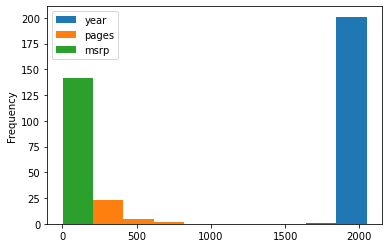

In [80]:
# Plotting the whole dataframe is not very useful
df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

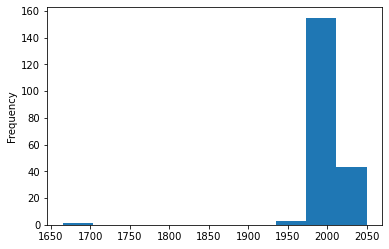

In [81]:
df['year'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

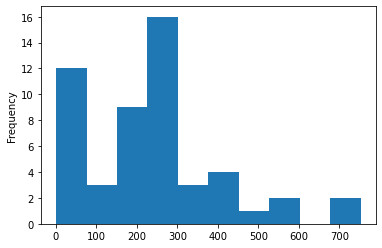

In [82]:
df['pages'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

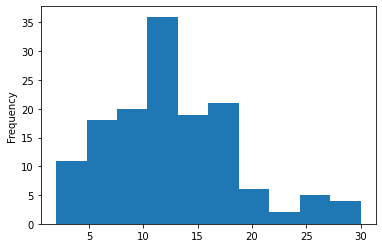

In [83]:
df['msrp'].plot.hist()

<AxesSubplot:>

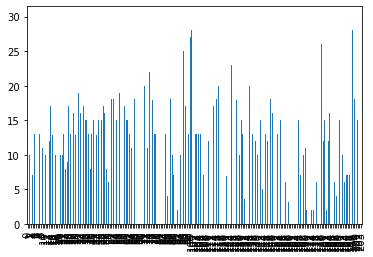

In [84]:
# Not very useful - is it using index for x?
df['msrp'].plot.bar()

<AxesSubplot:>

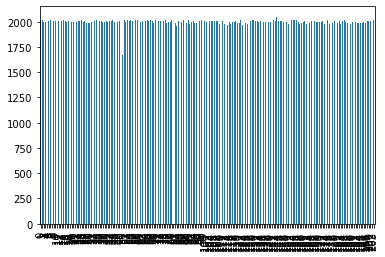

In [85]:
# Not very useful - is it using index for x?
df['year'].plot.bar()

<AxesSubplot:>

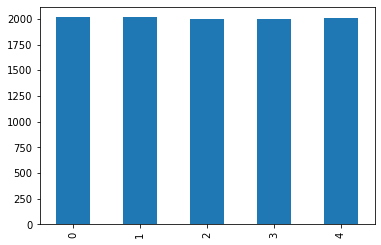

In [86]:
# Yes, it's using index for x
df['year'].head().plot.bar()

<AxesSubplot:xlabel='year', ylabel='pages'>

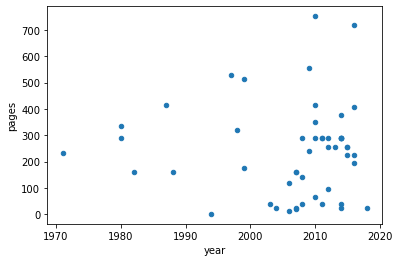

In [87]:
df.plot.scatter(x='year', y='pages')

<AxesSubplot:xlabel='year', ylabel='msrp'>

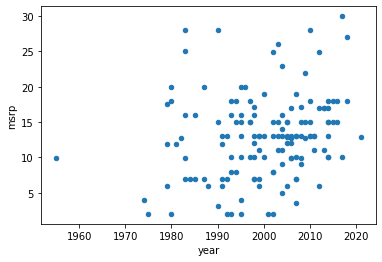

In [88]:
df.plot.scatter(x='year', y='msrp')

<AxesSubplot:xlabel='year', ylabel='msrp'>

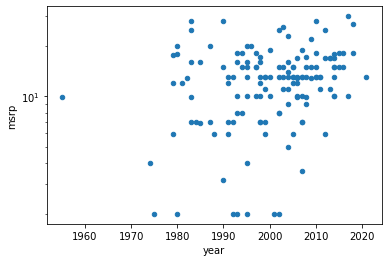

In [89]:
# Too close together for log-scale with msrp to be useful
df.plot.scatter(x='year', y='msrp', logy=True)